# test đọc video nhận diện biển số trên video

# test đọc biển số cho từng khung hình

Using cache found in C:\Users\Administrator/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-2-24 Python-3.9.0 torch-2.2.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


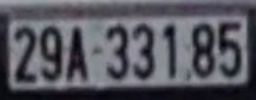

In [14]:
import cv2

import torch
 
model = torch.hub.load('ultralytics/yolov5', 'custom', path='weights/last.pt')

image = cv2.imread('1.jpg')

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#cv2.imshow("Image", image)
results = model(image)
results.show()
cv2.waitKey(0)
cv2.destroyAllWindows()

# test cắt tọa độ biển số xe trong khung hình

In [15]:
import cv2
import torch

model = torch.hub.load('ultralytics/yolov5', 'custom', path='weights/last.pt')

image = cv2.imread('2.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

results = model(image)

for i, det in enumerate(results.xyxy[0]):
    # Lấy tọa độ bbox của vật thể thứ i
    bbox = det[0:4].cpu().numpy()

    # In ra tọa độ bbox của vật thể thứ i
    print(f'Bbox {i}: {bbox}')


Using cache found in C:\Users\Administrator/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-2-24 Python-3.9.0 torch-2.2.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


# hàm get ảnh kí tự ra folder char để phân loại

In [16]:
def getchar(image, k, model):
    print(k)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = model(image)

    for i, det in enumerate(results.xyxy[0]):
        bbox = det[0:4].cpu().numpy()

        cropped_image = image[int(bbox[1]):int(bbox[3]), int(bbox[0]):int(bbox[2])]
        gray = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
        blurred = cv2.GaussianBlur(gray, (5, 5), 0)
        edges = cv2.Canny(blurred, threshold1=30, threshold2=100)
        edges = cv2.bitwise_not(edges)
        cv2.imshow("Edges Image", edges)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        
        _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
        num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary)
        
        d = 0
        
        for i in range(1, num_labels):
            area = stats[i, cv2.CC_STAT_AREA]
            if area < 100 or area > 1500:
                labels[labels == i] = 0
            else: 
                d = d+1
                # Thực hiện các hành động khác cho các nhãn hợp lệ (diện tích trong khoảng từ 100 đến 1500)

        if d > 5 and d < 10:
            for i in range(1, num_labels):
                x, y, w, h, area = stats[i]
                if 100 < area < 1500:
                    digit_img = binary[y:y+h, x:x+w]
                    cv2.imwrite(f"./char/char_{k}.png", digit_img)
                    k = k+1
                    
    return k


In [17]:
import cv2
import os
import torch
import numpy as np
from skimage import measure
import os


model = torch.hub.load('ultralytics/yolov5', 'custom', path='weights/best.pt')
folder_path = "/" # đường dẫn đến folder chứa ảnh

i = 99990
type = []
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".png"): 
        file_path = os.path.join(folder_path, filename)
        img = cv2.imread(file_path) # đọc ảnh bằng OpenCV
        getchar(img, i, model)
        i = i+10

Using cache found in C:\Users\Administrator/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-2-24 Python-3.9.0 torch-2.2.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [18]:
from PIL import Image
import os

# Đường dẫn đến thư mục chứa ảnh
folder_path = './aaa'

# Lặp qua từng file trong thư mục
for filename in os.listdir(folder_path):
    # Đường dẫn đầy đủ đến file
    file_path = os.path.join(folder_path, filename)

    # Kiểm tra nếu file đó là ảnh
    if os.path.isfile(file_path) and file_path.endswith(('.jpg', '.jpeg', '.png', '.bmp')):
        # Mở ảnh bằng Pillow
        img = Image.open(file_path)

        # Resize ảnh về kích thước rộng 25, cao 60
        img = img.resize((25, 60))

        # Lưu ảnh lại
        img.save(file_path)


# get kí tự cho toàn folder dataChar

In [19]:
import cv2
import os
import torch
import numpy as np
from skimage import measure
import os


model = torch.hub.load('ultralytics/yolov5', 'custom', path='weights/last.pt')
# Đường dẫn đến tập char
path = "aaa/"

i = 0
# Duyệt qua các ảnh trong thư mục
for filename in os.listdir(path):
    img = cv2.imread(path + filename)
    getchar(img, i, model)
    i = i + 8
    


Using cache found in C:\Users\Administrator/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-2-24 Python-3.9.0 torch-2.2.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


0
8
16
24
32
40


In [20]:
import cv2
import torch
import numpy as np
from skimage import measure
import os


model = torch.hub.load('ultralytics/yolov5', 'custom', path='weights/last.pt')

image = cv2.imread('3.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
results = model(image)

for i, det in enumerate(results.xyxy[0]):
    # Lấy tọa độ bbox của vật thể thứ i
    bbox = det[0:4].cpu().numpy()

    # Cắt lấy vùng ảnh nằm trong bbox
    cropped_image = image[int(bbox[1]):int(bbox[3]), int(bbox[0]):int(bbox[2])]
    cropped_image = cv2.resize(cropped_image, (256, 100))
    # cv2.imshow(f"Cropped image {i}", cropped_image)
    # Chuyển ảnh sang đen trắng
    gray = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, threshold1=30, threshold2=100)
    edges = cv2.bitwise_not(edges)
    # cv2.imshow(f"Cropped image {i}", edges)
    
    # Sử dụng hàm connectedComponents để tìm các vùng kết nối trên ảnh nhị phân
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    num_labels, labels = cv2.connectedComponents(binary)

    # Hiển thị số lượng các labels tìm được
    # print(f"Number of labels: {num_labels-1}")

    d = 0
    # Sử dụng hàm connectedComponentsWithStats để tính toán diện tích của các vùng kết nối
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary)
    for i in range(num_labels):
        area = stats[i, cv2.CC_STAT_AREA]
        if area < 100 or area > 1500:
            labels[labels == i] = 0
        else: 
            d = d+1
            # làm gì chưa biết? :D
            # hmm
    
        # Lặp qua các nhãn
    if (d > 5 and d < 10):
        for i in range(1, num_labels):
        # Lấy thông tin của nhãn hiện tại
            x, y, w, h, area = stats[i]

        # Nếu diện tích của nhãn nằm trong khoảng từ 100 đến 1500
            if 100 < area < 1500:
            # Cắt ảnh của nhãn hiện tại từ ảnh gốc
                digit_img = binary[y:y+h, x:x+w]

            # Thực hiện xử lý ảnh cho phù hợp với mô hình nhận dạng ký tự
            # ...

            # Lưu ảnh ký tự
                cv2.imwrite(f"digit2_{i}.png", digit_img)
        # print(labels)
    else:
        break

    h, w = image.shape[:2]
    label_hue = np.uint8(179 * labels / np.max(labels))

    blank_ch = 255 * np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
    labeled_img[label_hue == 0] = 0
    


    # Hiển thị ảnh với các vùng kết nối được tô màu
    cv2.imshow("Connected components", labeled_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    gray = cv2.cvtColor(labeled_img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, threshold1=30, threshold2=100)
    edges = cv2.bitwise_not(edges)
    cv2.imshow("Sau khi loai nhieu: ", edges)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    # Sử dụng hàm connectedComponents để tìm các vùng kết nối trên ảnh nhị phân
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    num_labels, labels = cv2.connectedComponents(binary)

Using cache found in C:\Users\Administrator/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-2-24 Python-3.9.0 torch-2.2.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [21]:
def feature(folder_path, file):
    print(folder_path)
    binaries = []

    # Lặp qua tất cả các tệp tin trong thư mục
    for filename in os.listdir(folder_path):
        # Nếu tệp tin có đuôi là '.png'
        if filename.endswith('.png'):
            # Đọc tệp tin ảnh bằng OpenCV
            img = cv2.imread(os.path.join(folder_path, filename), cv2.IMREAD_GRAYSCALE)
            ret, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
            binaries.append(binary)
        

    # tính toán số lượng pixel màu đen và màu trắng cho từng pixel trong các ma trận
    black_pixels = np.zeros_like(binaries[0])
    white_pixels = np.zeros_like(binaries[0])
    for binary in binaries:
        black_pixels += binary == 0
        white_pixels += binary == 255

    # so sánh số lượng pixel màu đen và màu trắng để quyết định màu sắc cuối cùng của pixel trong ma trận đặc trưng
    feature = np.zeros_like(binaries[0], dtype=np.uint8)
    for i in range(feature.shape[0]):
        for j in range(feature.shape[1]):
            if black_pixels[i][j] > white_pixels[i][j]:
                feature[i][j] = 0
            else:
                feature[i][j] = 255

    # xuất ra ma trận nhị phân đặc trưng
    np.savetxt('featured/featured'+file+'.txt', feature, fmt='%d')
    return feature

In [22]:
import cv2
import os
import numpy as np

features = []
folder_path = "char/"
files = os.listdir(folder_path)
for file in files:
    if os.path.isdir(os.path.join(folder_path, file)):
        folder_path_ii = os.path.join(folder_path, file)
        features.append(feature(folder_path_ii, file))

char/0
char/1
char/2
char/3
char/4
char/5
char/6
char/7
char/8
char/9
char/A
char/B
char/C
char/D
char/F
char/G
char/L
char/N
char/S
char/V
char/Y
char/Z
char/Z1


In [23]:
def predict(binary):
    n = 0
    max = 0
    i = 0
    # So sánh với feature
    for file in files:
        matching_pixels = np.sum(binary == features[i])
        total_pixels = binary.shape[0] * binary.shape[1]
        matching_percentage = matching_pixels / total_pixels * 100
        if (matching_percentage>max): 
            n = i
            max = matching_percentage
        i = i + 1
    return n
        

In [24]:
def readPlate(image, model):

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = model(image)

    for i, det in enumerate(results.xyxy[0]):
        # Lấy tọa độ bbox của vật thể thứ i
        bbox = det[0:4].cpu().numpy()

        # Cắt lấy vùng ảnh nằm trong bbox
        cropped_image = image[int(bbox[1]):int(bbox[3]), int(bbox[0]):int(bbox[2])]
        cropped_image = cv2.resize(cropped_image, (256, 100))
        # cv2.imshow(f"Cropped image {i}", cropped_image)
        # Chuyển ảnh sang đen trắng
        gray = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
        blurred = cv2.GaussianBlur(gray, (5, 5), 0)
        edges = cv2.Canny(blurred, threshold1=30, threshold2=100)
        edges = cv2.bitwise_not(edges)
        # cv2.imshow(f"Cropped image {i}", edges)
        
        # Sử dụng hàm connectedComponents để tìm các vùng kết nối trên ảnh nhị phân
        _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
        num_labels, labels = cv2.connectedComponents(binary)

        # Hiển thị số lượng các labels tìm được
        # print(f"Number of labels: {num_labels-1}")

        d = 0
        # Sử dụng hàm connectedComponentsWithStats để tính toán diện tích của các vùng kết nối
        num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary)
        for i in range(num_labels):
            area = stats[i, cv2.CC_STAT_AREA]
            if area < 100 or area > 1500:
                labels[labels == i] = 0
            else: 
                d = d+1
                # làm gì chưa biết? :D
                # hmm
        
        x_centroids = centroids[:, 0] # Lấy tất cả các hàng, cột đầu tiên (tương ứng với tọa độ x)
        
        predicted = ""
        xx = []
        # Lặp qua các nhãn
        if (d > 5 and d < 11):
            for i in range(1, num_labels):
            # Lấy thông tin của nhãn hiện tại
                x, y, w, h, area = stats[i]

            # Nếu diện tích của nhãn nằm trong khoảng từ 100 đến 1500
                if 100 < area < 1500:
                # Cắt ảnh của nhãn hiện tại từ ảnh gốc
                    digit_img = binary[y:y+h, x:x+w]
                    digit_img = cv2.resize(digit_img, (25,60))
                    xx.append((x_centroids[i], predict(digit_img)))
                    # np.savetxt('featuretest'+str(i)+'.txt', digit_img, fmt='%d')
                    # if (predict(digit_img) <= 9):
                    #     predicted = predicted + str(predict(digit_img))
                    # if (predict(digit_img) == 10):
                    #     predicted = predicted + "A"
                    # if (predict(digit_img) == 11):
                    #     predicted = predicted + "F"
                    # if (predict(digit_img) == 12):
                    #     predicted = predicted + "G"

        else:
            break

        sorted_list = sorted(xx, key=lambda x: x[0])

        predicted = ""

        for x, value in sorted_list:
            if (value == 10):
                predicted += "A"
            elif (value == 11):
                predicted += "B"
            elif (value == 12):
                predicted += "C"
            elif (value == 13):
                predicted += "D"
            elif (value == 14):
                predicted += "F"
            elif (value == 15):
                predicted += "G"
            elif (value == 16):
                predicted += "L"
            elif (value == 17):
                predicted += "N"
            elif (value == 18):
                predicted += "V"
            else:
                predicted += str(value)
        # print("Biển số xe dự đoán được là: "+ predicted)

        # print("Nhãn dự đoán: ", predicted)
        # h, w = image.shape[:2]
        # label_hue = np.uint8(179 * labels / np.max(labels))

        # blank_ch = 255 * np.ones_like(label_hue)
        # labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
        # labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
        # labeled_img[label_hue == 0] = 0
        


        # # Hiển thị ảnh với các vùng kết nối được tô màu
        # cv2.imshow("Connected components", labeled_img)
        # cv2.waitKey(0)
        # cv2.destroyAllWindows()
        # gray = cv2.cvtColor(labeled_img, cv2.COLOR_BGR2GRAY)
        # blurred = cv2.GaussianBlur(gray, (5, 5), 0)
        # edges = cv2.Canny(blurred, threshold1=30, threshold2=100)
        # edges = cv2.bitwise_not(edges)
        # cv2.imshow("Sau khi loai nhieu: ", edges)
        # cv2.waitKey(0)
        # cv2.destroyAllWindows()
        # # Sử dụng hàm connectedComponents để tìm các vùng kết nối trên ảnh nhị phân
        # _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
        # num_labels, labels = cv2.connectedComponents(binary)
    return predicted

In [25]:
import cv2
import torch
import numpy as np
from skimage import measure
import os
import pandas as pd


model = torch.hub.load('ultralytics/yolov5', 'custom', path='weights/best.pt')

folder_path = "kiemthu/" # đường dẫn đến folder chứa ảnh

predicted = []
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".png"): 
        # kiểm tra xem file có phải là ảnh jpg hoặc png không
        file_path = os.path.join(folder_path, filename)
        img = cv2.imread(file_path) # đọc ảnh bằng OpenCV
        # sử dụng ảnh tại đây
        predicted.append((filename, readPlate(img, model)))

# Tạo DataFrame từ mảng
df = pd.DataFrame(predicted, columns=['Ảnh', 'Đọc biển số'])

# Xuất ra file CSV
df.to_csv('outputofkt.csv', index=False)



Using cache found in C:\Users\Administrator/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-2-24 Python-3.9.0 torch-2.2.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [26]:
import cv2

import torch

model = torch.hub.load('ultralytics/yolov5', 'custom', path='weights/best.pt')

# Tạo một đối tượng VideoCapture để đọc video
cap = cv2.VideoCapture('test.MOV')

# Lấy kích thước khung hình của video
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Tạo đối tượng VideoWriter để ghi video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('processed_video.mp4', fourcc, 30, (width, height))
# Đọc từng khung hình của video, xử lý và ghi lại
result_s = ''
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Xử lý khung hình ở đây
    processed_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = model(processed_frame)
    print(len(results.pred))
    accuracy = float(results.pred[0][0][4].item())
    if (accuracy >= 0.95):
        result_s = readPlate(processed_frame,model)
    # Vẽ chuỗi result_s lên khung hình results
    cv2.putText(results.render()[0], result_s, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    # Ghi khung hình đã xử lý vào đối tượng VideoWriter
    out.write(cv2.cvtColor(results.render()[0], cv2.COLOR_RGB2BGR))

    # # Hiển thị khung hình đã xử lý
    cv2.imshow('Processed Frame', cv2.cvtColor(results.render()[0], cv2.COLOR_RGB2BGR))
    if cv2.waitKey(1) == ord('q'):
        break

# Giải phóng các tài nguyên và đóng các cửa sổ hiển thị
out.release()
cv2.destroyAllWindows()


Using cache found in C:\Users\Administrator/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-2-24 Python-3.9.0 torch-2.2.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


IndexError: index 0 is out of bounds for dimension 0 with size 0

: 